In [1]:
import psycopg2
import config as creds
import sqlalchemy
from sqlalchemy import create_engine
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user=creds.PGUSER
password=creds.PGPASSWORD
host=creds.PGHOST
port=5432
database=creds.PGDATABASE

In [3]:
engine_str=f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(engine_str)
conn = engine.raw_connection()
print('Connected')
cur = conn.cursor()
print('Cursor created')

Connected
Cursor created


In [4]:
query2='''SELECT b.month, b.PID, b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b. energystarscore, b.elegas, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b. reportedbuildinggrossfloorarea > 50000
AND b. reportingyear=2019;
'''

In [5]:
df2=pd.read_sql(query2, conn)
df2['kbtusqft']=df2['kbtu']/df2['reportedbuildinggrossfloorarea']


In [6]:
query4='''SELECT b.month, b.PID, b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b. energystarscore, b.elegas, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.primarypropertytype_selfselect = '7'
AND b. reportedbuildinggrossfloorarea > 50000
AND b. reportingyear=2019;
'''

In [7]:
df4 = pd.read_sql(query4, conn)
df4['kbtusqft']=df4['kbtu']/df4['reportedbuildinggrossfloorarea']

In [8]:
query5='''SELECT b.month, b.PID, b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b. energystarscore, b.elegas, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.PID = 'PM6211783'
AND b. reportingyear=2019;
'''

In [9]:
df5 = pd.read_sql(query5, conn)
df5['kbtusqft']=df5['kbtu']/df5['reportedbuildinggrossfloorarea']

In [10]:
conn.close()

In [11]:
# Plot Global Set
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

(-2.0, 18.0)

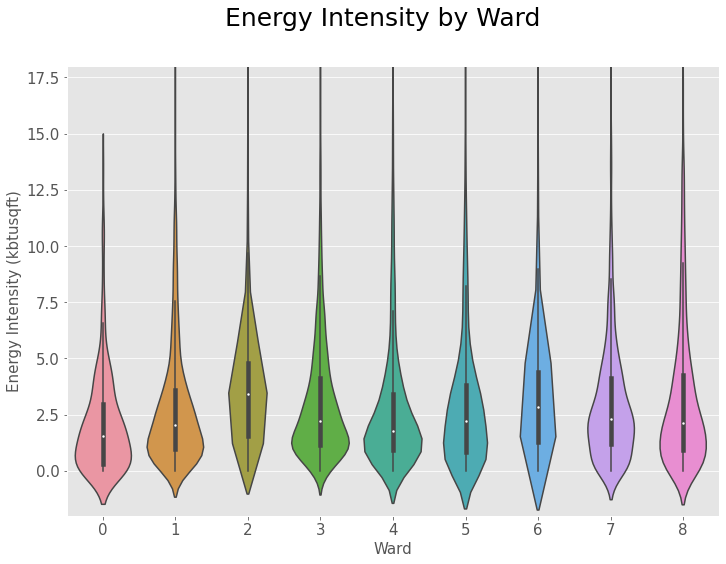

In [12]:
plt.style.use('ggplot')
a4_dims = (11.7, 8.27)   
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="ward",y="kbtusqft", data=df2, cmap='coolwarm')
fig.suptitle(t = 'Energy Intensity by Ward', fontsize=25)
ax.set_xlabel('Ward', fontsize=15)
ax.set_ylabel('Energy Intensity (kbtusqft)',fontsize=15)
ax.set_ylim(-2,18)

In [13]:
df2['primarypropertytype_selfselect'].value_counts().index

Index(['7', '10', '2', '19', '3', '6', '9', '14', '15', '13', '4', '11', '16',
       '17', '8', '18', '5'],
      dtype='object')

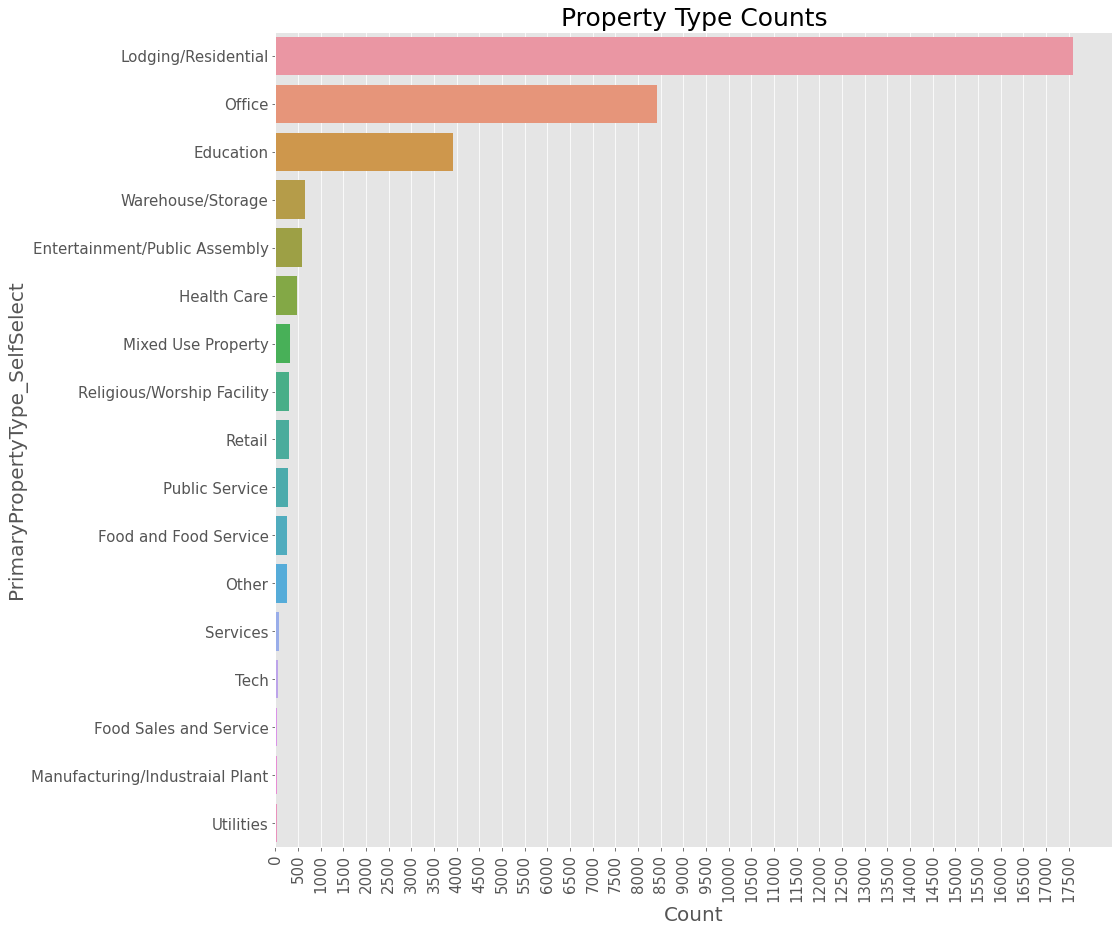

In [14]:
plt.style.use('ggplot')
cp =sns.countplot(y='primarypropertytype_selfselect', data=df2,order=df2['primarypropertytype_selfselect'].value_counts().index)
ax = cp.axes
ax.set_yticklabels(labels=['Lodging/Residential','Office','Education','Warehouse/Storage','Entertainment/Public Assembly',
                           'Health Care','Mixed Use Property', 'Religious/Worship Facility', 'Retail', 'Public Service',
                   'Food and Food Service', 'Other', 'Services', 'Tech', 'Food Sales and Service', 
                   'Manufacturing/Industraial Plant', 'Utilities'] )
plt.title(label='Property Type Counts', fontsize=25)
plt.ylabel(ylabel='PrimaryPropertyType_SelfSelect', fontsize=20)
plt.xlabel(xlabel='Count', fontsize=20)
plt.xticks(np.arange(0, 18000, step=500))
plt.xticks(rotation=90)
cp.figure.set_size_inches(15,15)


<Figure size 432x288 with 0 Axes>

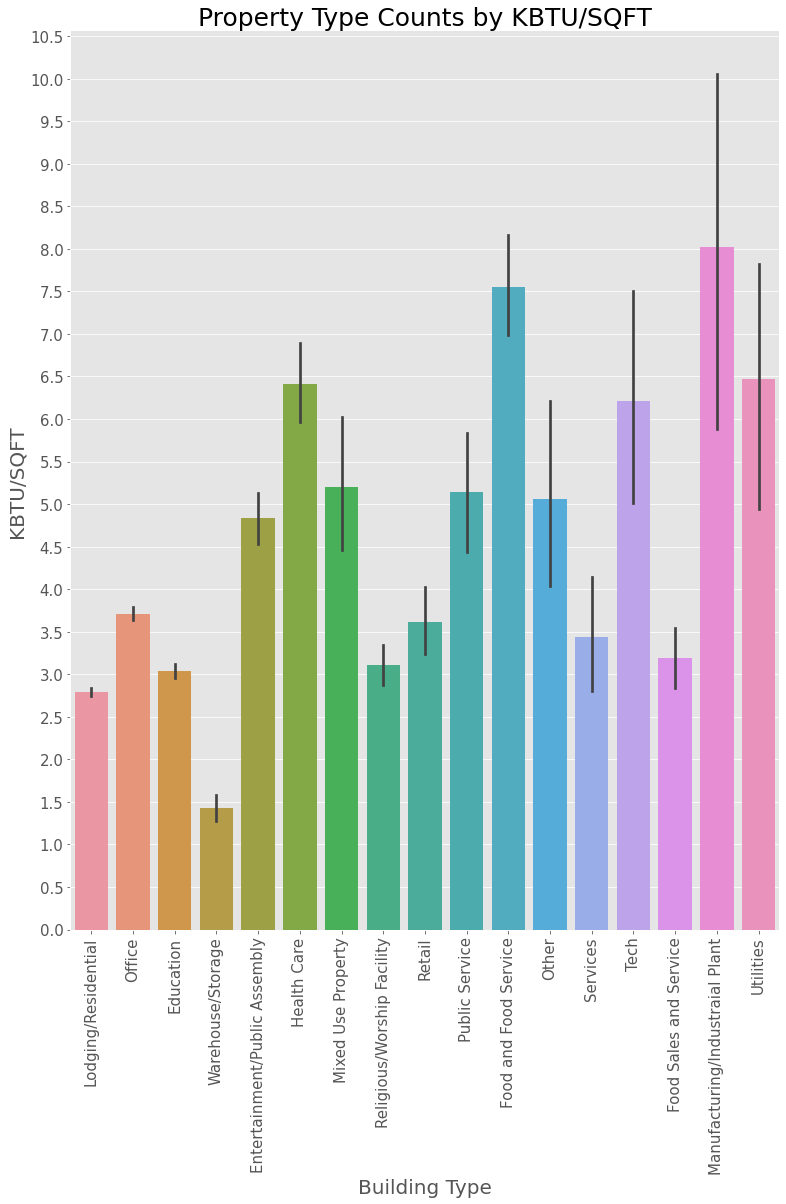

In [15]:
plt.style.use('ggplot')
fig = plt.gcf()
cat = sns.catplot(data=df2, kind='bar', x='primarypropertytype_selfselect', y='kbtusqft',
                  order=df2['primarypropertytype_selfselect'].value_counts().index)
cat.set_xticklabels(labels=['Lodging/Residential','Office','Education','Warehouse/Storage','Entertainment/Public Assembly',
                           'Health Care','Mixed Use Property', 'Religious/Worship Facility', 'Retail', 'Public Service',
                   'Food and Food Service', 'Other', 'Services', 'Tech', 'Food Sales and Service', 
                   'Manufacturing/Industraial Plant', 'Utilities'] )
plt.title(label='Property Type Counts by KBTU/SQFT', fontsize=25)
plt.ylabel(ylabel='KBTU/SQFT', fontsize=20)
plt.yticks(np.arange(0, 11, step=0.5))
plt.xlabel(xlabel='Building Type', fontsize=20)
plt.xticks(rotation=90)
cat.fig.set_size_inches(12, 15)


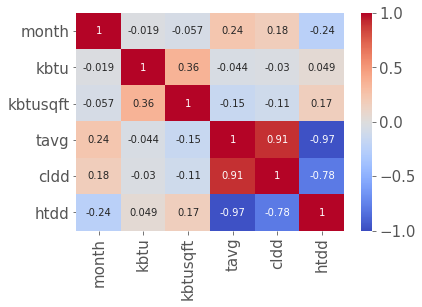

In [16]:
plt.style.use('ggplot')
df3=df2[['month', 'kbtu', 'kbtusqft', 'tavg','cldd', 'htdd']]
heat= sns.heatmap(data=df3.corr(),vmin =-1, vmax=1, annot=True, cmap='coolwarm')

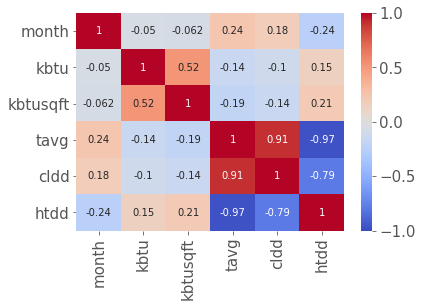

In [17]:
plt.style.use('ggplot')
heat= sns.heatmap(data=df4[['month', 'kbtu', 'kbtusqft', 'tavg','cldd', 'htdd']].corr(),vmin =-1, vmax=1, annot=True, cmap='coolwarm')

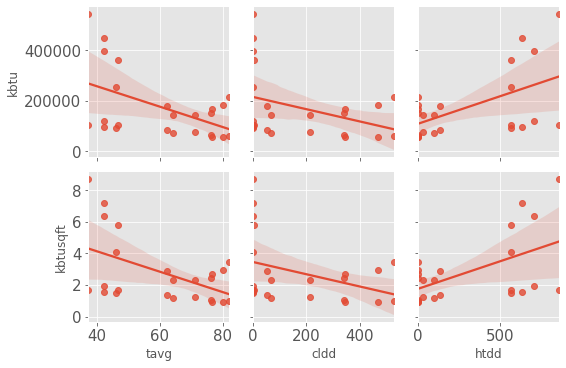

In [21]:
plt.style.use('ggplot')
r=sns.PairGrid(df5, y_vars=['kbtu','kbtusqft'],x_vars =['tavg', 'cldd', 'htdd'], palette='coolwarm')
r.map(sns.regplot)
